# Data Visualization examples

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Bar plot

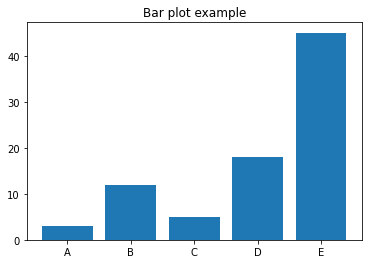

In [2]:
# Make a fake dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Bar plot example')

# Show graphic
plt.show()

## Histogram

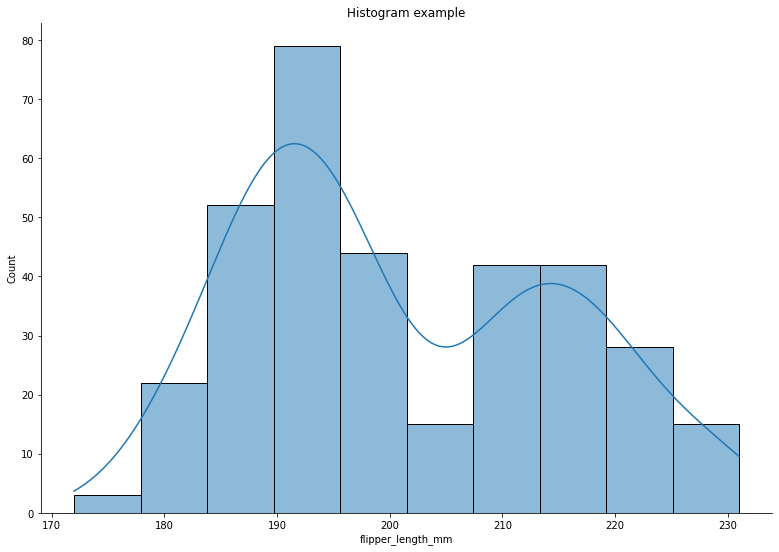

In [3]:
penguins = sns.load_dataset("penguins")
a = sns.displot(data=penguins, x="flipper_length_mm", kde=True)
a.fig.set_size_inches(12, 8)
plt.title('Histogram example')
plt.show(a)

## Line chart

### With values as X axis

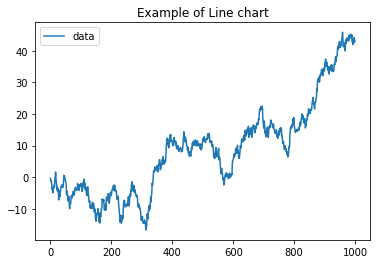

In [4]:
# create data
values=np.cumsum(np.random.randn(1000,1))

# use the plot function
plt.plot(values)
plt.legend(['data'])
plt.title('Example of Line chart')
plt.show()

### With dates as X axis

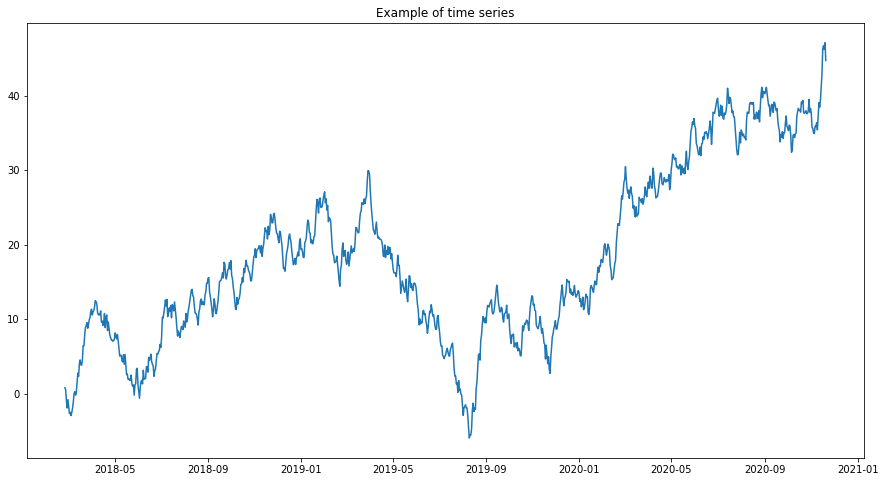

In [5]:
from datetime import datetime, timedelta
plt.figure(figsize=(15, 8))

# create data
dates = [datetime.now() - timedelta(number) for number in range(len(values), 0, -1)]
values=np.cumsum(np.random.randn(1000,1))


# use the plot function
plt.plot(dates, values)
plt.title('Example of time series')
plt.show()

## Scatter plot

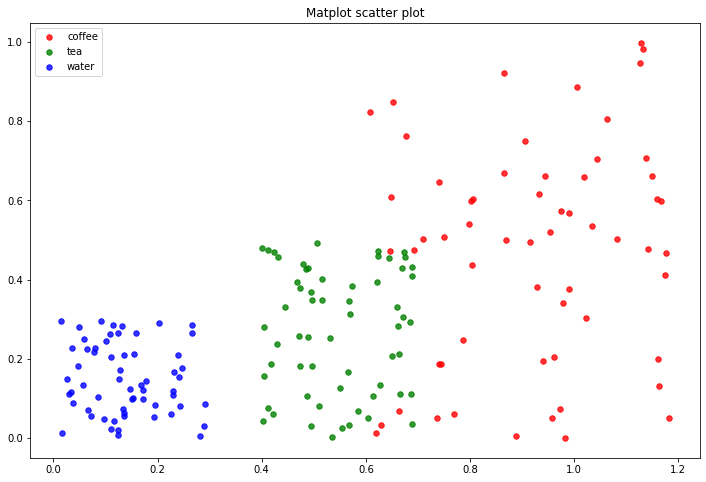

In [6]:
# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water")

# Create plot
fig = plt.figure(figsize=(12, 8))
for data, color, group in zip(data, colors, groups):
    x, y = data
    plt.scatter(x, y, alpha=0.8, c=color, s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

## Pie Chart

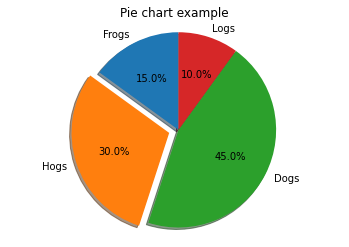

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie chart example')
plt.show()

## Box Plot

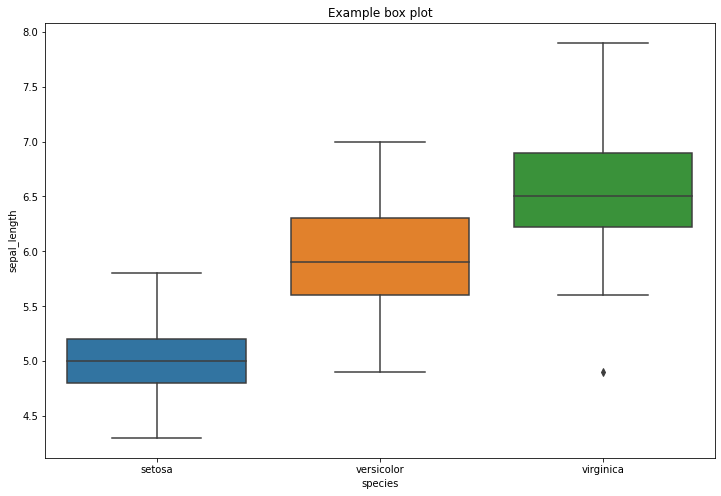

In [8]:
df = sns.load_dataset('iris') 
a = sns.boxplot(x=df["species"], y=df["sepal_length"])
a.figure.set_size_inches(12, 8)
plt.title('Example box plot')
plt.show(a)

## Spider plot

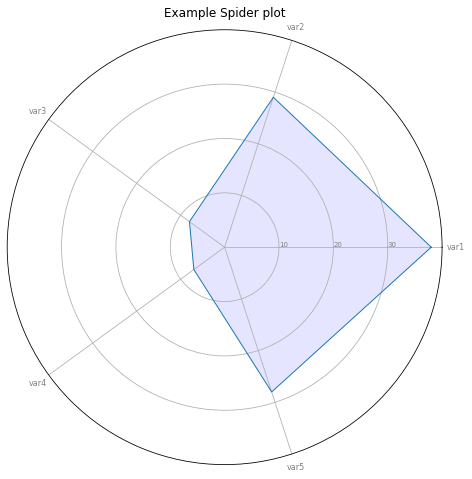

In [9]:
from math import pi
 
df = pd.DataFrame({
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values= df.loc[0, :].values.tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(14, 8))
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Example Spider plot')
plt.show()

## Heat Map

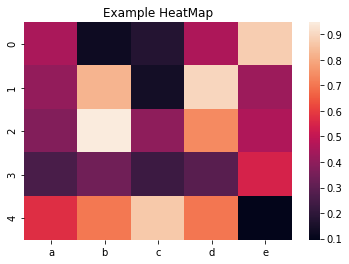

In [10]:
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

# Default heatmap: just a visualization of this square matrix
plt.title('Example HeatMap')
p1 = sns.heatmap(df)


## Map plot

In [11]:
import folium

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Network chart

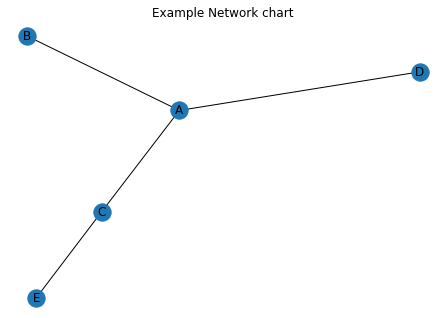

In [12]:
import networkx as nx
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.title('Example Network chart')
plt.show()

## Wordcloud

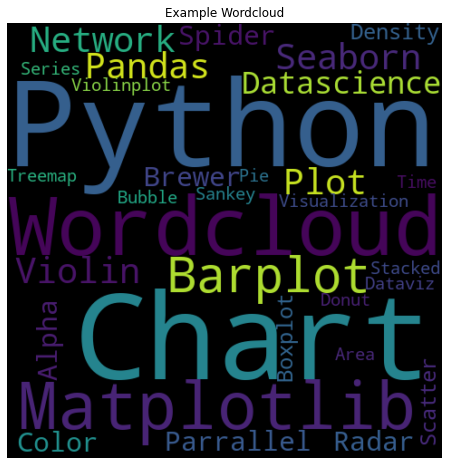

In [13]:
from wordcloud import WordCloud
 
# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Example Wordcloud')
plt.show()
